## PREGUNTA 1 ¿Cuál es la probabilidad de que si alguien ingreso al hospital por emergencia regrese en un plazo menor a 30 dias, regrese en un plazo mayor a 30 dias o no regrese?

In [26]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

%matplotlib inline

df = pd.read_csv('diabetic_data.csv')
diabetes = pd.read_csv('diabetic_data.csv')

In [27]:
diabetes.admission_type_id.mode()
p = diabetes[(diabetes.admission_type_id == 1)&(diabetes.readmitted =='<30')]
p.count()
prob = p.count()*100/diabetes.count()

In [28]:
## Funcion
def funcion(Readmitted):
    probreadmitted = prob[prob.index == Readmitted]
    print (probreadmitted)

In [29]:
## Groupby
a = df.groupby(['admission_type_id','readmitted']).encounter_id.count()
tablaProb = a/a.sum()
print (tablaProb*100)

admission_type_id  readmitted
1                  <30            6.113044
                   >30           18.973921
                   NO            27.966118
2                  <30            2.030148
                   >30            6.340035
                   NO             9.789124
3                  <30            1.926970
                   >30            5.646287
                   NO            10.968300
4                  <30            0.000983
                   >30            0.001965
                   NO             0.006879
5                  <30            0.486410
                   >30            1.691135
                   NO             2.524419
6                  <30            0.575831
                   >30            2.192284
                   NO             2.431067
7                  NO             0.020636
8                  <30            0.026531
                   >30            0.082542
                   NO             0.205373
Name: encounter_id, dtyp

In [30]:
## Codigo de la tabla
tabla = pd.crosstab(df.readmitted, df.admission_type_id)
prob = tabla/tabla.sum().sum()
print (prob*100)

admission_type_id          1         2          3         4         5  \
readmitted                                                              
<30                 6.113044  2.030148   1.926970  0.000983  0.486410   
>30                18.973921  6.340035   5.646287  0.001965  1.691135   
NO                 27.966118  9.789124  10.968300  0.006879  2.524419   

admission_type_id         6         7         8  
readmitted                                       
<30                0.575831  0.000000  0.026531  
>30                2.192284  0.000000  0.082542  
NO                 2.431067  0.020636  0.205373  


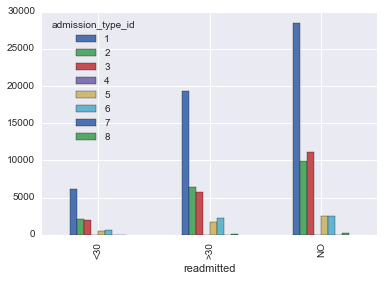

In [31]:
## Grafica
graficars = pd.crosstab(index=df['readmitted'],
           columns=df['admission_type_id']).plot(kind='bar')